In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Number of nodes: 15


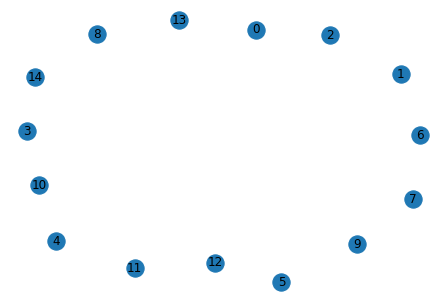

In [13]:
G=nx.Graph()
#I generate random 15 nodes
G.add_nodes_from(range(0,15))
n_nodes = len(G)
print("Number of nodes:", n_nodes)
nx.draw(G, with_labels=True)

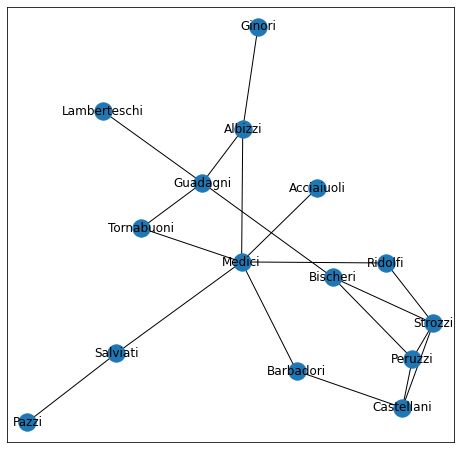

In [14]:
#I do a mapping to substitute each node with a name of a Florence family
mapping = {0:"Lamberteschi",1:"Peruzzi",2:"Bischeri",3:"Guadagni",4:"Castellani",5:"Strozzi",
           6:"Tornabuoni",7:"Ridolfi",8:"Albizzi",9:"Ginori",10:"Barbadori",11:"Medici",12:"Acciaiuoli",
          13:"Salviati",14:"Pazzi"}
#I relabel the nodes according to the mapping
H=nx.relabel_nodes(G,mapping)
#Here I added all the edges and plot the graph
H.add_edge(("Lamberteschi"),("Guadagni"))
H.add_edge(("Bischeri"),("Guadagni"))
H.add_edge(("Tornabuoni"),("Guadagni"))
H.add_edge(("Albizzi"),("Guadagni"))
H.add_edge(("Bischeri"),("Strozzi"))
H.add_edge(("Bischeri"),("Peruzzi"))
H.add_edge(("Peruzzi"),("Strozzi"))
H.add_edge(("Peruzzi"),("Castellani"))
H.add_edge(("Strozzi"),("Castellani"))
H.add_edge(("Strozzi"),("Ridolfi"))
H.add_edge(("Castellani"),("Barbadori"))
H.add_edge(("Tornabuoni"),("Medici"))
H.add_edge(("Ridolfi"),("Medici"))
H.add_edge(("Albizzi"),("Medici"))
H.add_edge(("Albizzi"),("Ginori"))
H.add_edge(("Barbadori"),("Medici"))
H.add_edge(("Medici"),("Acciaiuoli"))
H.add_edge(("Medici"),("Salviati"))
H.add_edge(("Salviati"),("Pazzi"))
fig = plt.figure(figsize=(8,8))
nx.draw_networkx(H)
plt.savefig("Families.png")
#plt.show(H)

In [15]:
#Here I keep trace of the indices of each node, useful in the second part of the algorithm
indices = dict()
for i in range(n_nodes):
    indices[list(H.nodes)[i]] = i
print(indices)

{'Lamberteschi': 0, 'Peruzzi': 1, 'Bischeri': 2, 'Guadagni': 3, 'Castellani': 4, 'Strozzi': 5, 'Tornabuoni': 6, 'Ridolfi': 7, 'Albizzi': 8, 'Ginori': 9, 'Barbadori': 10, 'Medici': 11, 'Acciaiuoli': 12, 'Salviati': 13, 'Pazzi': 14}


In [16]:
# Number of iterations set to 50
n_iter = 50;
    
# I set the stubborn node according to the test
stubborn = [("Medici"), ("Strozzi")];
#Here I keep trace of the position of the stubborn nodes
stubborn_id = [indices.get(key) for key in stubborn]
#Here I retrieve the regular nodes
regular = [node for node in H.nodes if node not in stubborn]
#Keep trace of position of regular nodes
regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
#Debug check
print("Stubborn nodes:", stubborn)
print("Regular nodes:", regular)

# Condition of the stubbord nodes, "1" for "Medici" familt and "-1" for "Strozzi" family
u = [1,-1]


# computation of P matrix exploiting linear algebra tools, provided by Numpy library
A = nx.adjacency_matrix(H) 
A = A.toarray() 
degrees = np.sum(A,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ A

#I need the submatrices of P
Q = P[np.ix_(regular_id, regular_id)]
E = P[np.ix_(regular_id, stubborn_id)]

# I put a randomic initiali condition for the regular nodes
ic = np.random.uniform(1,-1,len(regular))


# Now there all the elements to start the dynamics, here I put the initial condition
x = np.zeros((n_nodes,n_iter))
x[stubborn_id,0] = u;
x[regular_id,0] = ic;
print("Initial condition:", x[:,0])

# Dynamics algorithm evolution during 50 iterations
for t in range(1,n_iter):
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
    x[stubborn_id, t] = x[stubborn_id, t-1];

x_final = x[:,n_iter-1]
#I initialize a list to store the equilibrium vector
equilibrium=[]
for key in indices.keys():
    equilibrium.append(x_final[indices[key]]) 

print(equilibrium)




Stubborn nodes: ['Medici', 'Strozzi']
Regular nodes: ['Lamberteschi', 'Peruzzi', 'Bischeri', 'Guadagni', 'Castellani', 'Tornabuoni', 'Ridolfi', 'Albizzi', 'Ginori', 'Barbadori', 'Acciaiuoli', 'Salviati', 'Pazzi']
Initial condition: [ 0.17720832  0.13940566 -0.32879802 -0.30392693 -0.57286033 -1.
  0.39491115 -0.32143632 -0.68232755 -0.22139262 -0.751168    1.
 -0.76527703 -0.65883791  0.44395597]
[0.27270918859104354, -0.6363690888528901, -0.4545531911881302, 0.2727080359805766, -0.45454774945391896, -1.0, 0.6363545942955218, 0.0, 0.6363513099026895, 0.6363435368096295, 0.27272540168628845, 1.0, 1.0, 0.9999999834285964, 0.9999999011255555]


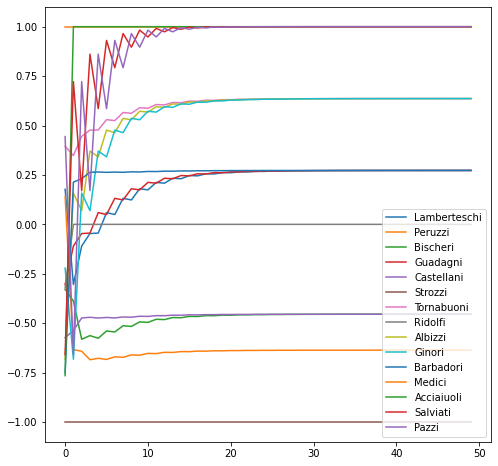

In [17]:
#In this cell I plot the trajectories representing the evolution of the opinion 
import matplotlib.pyplot as plt
families=[]
for key in mapping:
    families.append(mapping[key])   

fig = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)

for i in enumerate(families):
    trajectory = x[i[0],:]
    
    ax.plot(trajectory,label=i[1])
    
ax.legend()
plt.savefig("Trajectories.png")

In [18]:
#Firstly, I apply the definition algorithm for pagerank centrality, in view to have 
#a feedback with the distributed computation of the pagerank centrality.
#Alpha = 0.85, because beta must be 0.15 and alpha = 1 - beta
nx.algorithms.link_analysis.pagerank_alg.pagerank(H,0.85)

{'Lamberteschi': 0.03202380862614049,
 'Peruzzi': 0.07018669768905662,
 'Bischeri': 0.07152768304944948,
 'Guadagni': 0.10363968342248671,
 'Castellani': 0.07165770456948056,
 'Strozzi': 0.09231779767919304,
 'Tornabuoni': 0.053847957717114925,
 'Ridolfi': 0.051441782879237674,
 'Albizzi': 0.08212695905832179,
 'Ginori': 0.03326886799001193,
 'Barbadori': 0.05212720844546092,
 'Medici': 0.1540500134086529,
 'Acciaiuoli': 0.03182414909097444,
 'Salviati': 0.06312994200096989,
 'Pazzi': 0.036829744373448464}

In [19]:
#I set my initial conditions
iterations=100
beta=0.15
#u is a vector of all ones with length equal to the number of node
u=np.ones(n_nodes)
#lambda is equal to beta multiplied the normalized vector u (lambda is a keyword in Python so I change variable's name)
landa= beta * u/sum(u)
#I have to initialize the dynamic model
y=np.zeros((n_nodes,iterations))
y[:,0]=np.random.uniform(-1,1,n_nodes)
#P is already computed and Q must be equal to (1-beta)Q
Q=(1-beta)*P
#Then I have to transpose it according to the definition of dynamics:
#y(t+1)= Q'y(t) + lambda
qt=np.transpose(Q)
#Now I am able to write the iterative model according to its formula
for t in range(1,iterations):
    y[:,t]=qt@y[:,t-1]+landa
#I store all the elements in a resulting vector
y_result=y[:,iterations-1]


In [20]:
#I want to print the centralities in a descending order
#Initialization of a dictionary of this form {'family', 'centrality value'}
centralities={}
for key in indices.keys():#I iterate over the families
    centralities[key]=y_result[indices[key]] #I retrieve the correspondent centrality
 #I sort the elements by key in a descending order   
sorted(centralities.items(), key = lambda item: -item[1])

[('Medici', 0.15405121289814694),
 ('Guadagni', 0.10364043875851135),
 ('Strozzi', 0.09231797964116124),
 ('Albizzi', 0.08212624869763056),
 ('Castellani', 0.07165774882323513),
 ('Bischeri', 0.07152738902750921),
 ('Peruzzi', 0.07018668950284072),
 ('Salviati', 0.0631294221999203),
 ('Tornabuoni', 0.053847512668890644),
 ('Barbadori', 0.05212694827432455),
 ('Ridolfi', 0.05144149011334508),
 ('Pazzi', 0.03683000325951683),
 ('Ginori', 0.03326910262110693),
 ('Lamberteschi', 0.0320235920391861),
 ('Acciaiuoli', 0.03182392062970454)]

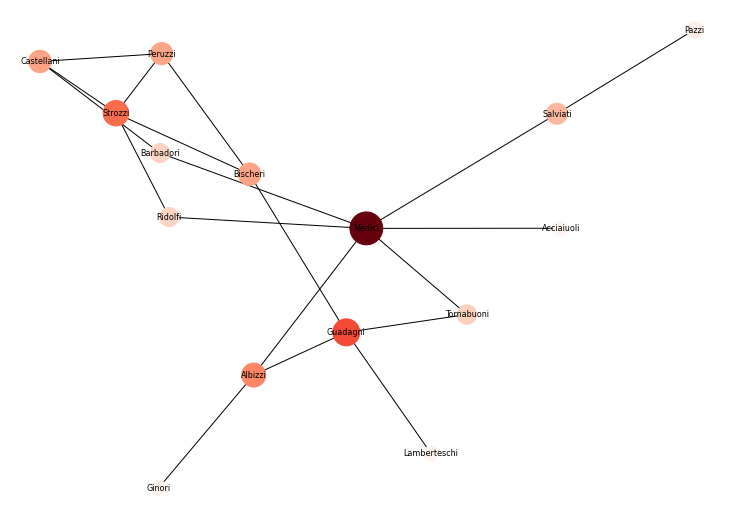

In [21]:
#Plot of the centralities
pos = nx.spring_layout(H) 
plt.figure(1, figsize=(10,7))
nx.draw(H, pos,
          with_labels=True,
          nodelist=centralities.keys(),
          # node size is a value proportional to eigenvector centrality
          node_size = [d*7000 for d in centralities.values()],  
          node_color=list(centralities.values()),
          font_size=8,
          cmap=plt.cm.Reds,
          )
plt.savefig("Centralities.png")